<h1 style="color: #14549C">Test de Normalidad</h1>

### Introducción.
<br>
<div style="text-align: justify">
La distribución normal es posiblemente uno de los modelos de distribución de probabilidad más importantes. Tan solo en finanzas, la normalidad de los datos es una de las suposiciones más comunes, usada en la Teoria Moderna del Portafolio moderna, las ecuaciones de Black-Scholes, el modelo CAPM (Capital Asset Pricing Model), la Teoria de Valuación de Opciones, la Hipotesis de los Mercados Eficientes, etc.
<br> <br>
En este documento, se usarán dos test de normalidad (Jarque-Bera y el test de D’Agostino and Pearson’s) para hacer un análisis de las acciones de Microsoft (periodo: 01/ene/2015 - 18/jun/2020) y así poder especular con los precios.
</div>

### Hipótesis nula y alternativa en pruebas de normalidad:
> Hipótesis nula <br> $H_0:$ $X$ sigue una distribución normal
> 
> Hipótesis alternativa <br>$H_1:$  $X$ NO sigue una distribución normal

Si el $p-valor$ asociado al estadístico de prueba utilizado es menor a $\alpha$ (5%), se rechaza $H_0$. En caso contrario, se acepta $H_0$

In [1]:
#Librerias usadas
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np

In [2]:
#Datos de Microsoft de 2015 a fecha de realización
data = web.DataReader("MSFT", data_source="yahoo", start="01/01/2015", end="06/18/2020")["Adj Close"]

In [3]:
#precios recientes
data.tail()

Date
2020-06-12    187.740005
2020-06-15    188.940002
2020-06-16    193.570007
2020-06-17    194.240005
2020-06-18    196.320007
Name: Adj Close, dtype: float64

###### La media y la desvición estándar de los precios representan la tasa de retorno y el riesgo de las acciones de microsoft

In [4]:
data.sort_index(inplace=True)

#Retorno diario, media de gannacias y riesgo
rets = data.pct_change()
mean = rets.mean()
risk = rets.std()

#retorno acumulado diario
cret = (rets + 1).cumprod() - 1

###### Gráfica de los precios de las acciones de MSFT, crecimiento % diario y distribución de los retornos diarios.

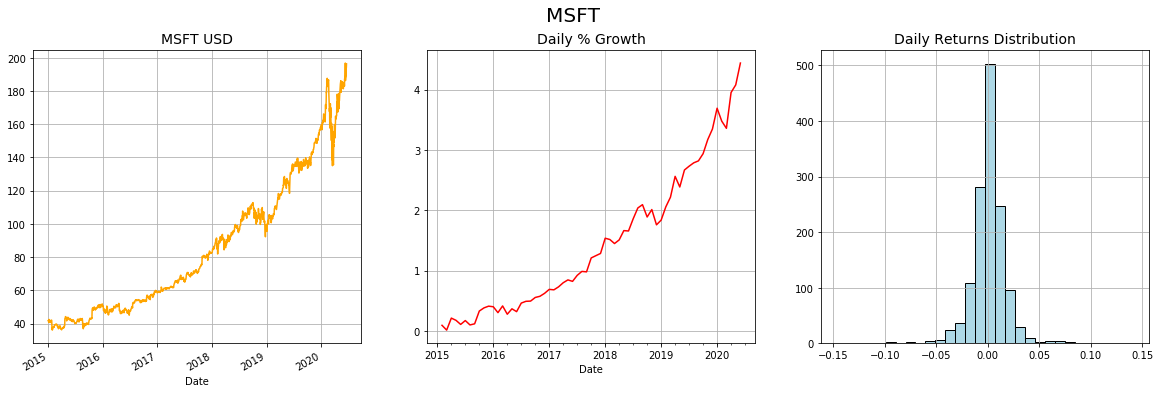

In [106]:
plt.figure(figsize=(20,6))
plt.suptitle("MSFT", fontsize=20)

plt.subplot(131)
plt.title("MSFT USD", fontsize=14)
data.plot(color="orange")
plt.grid()

plt.subplot(132)
plt.title("Daily % Growth", fontsize=14)
cret.plot(color="red")
plt.grid()

plt.subplot(133)
plt.title("Daily Returns Distribution", fontsize=14)
rets.hist(bins=30, ec="black", color="lightblue")
plt.grid(True)

In [14]:
print("retorno promedio diario:", round(mean,4), "\ny riesgo diario", round(risk,4))

retorno promedio diario: 0.0013 
y riesgo diario 0.0174



###### Para inversiones a mediano plazo, resulta más cómodo trabajar con rendimientos y riesgo en peridos mensuales

In [37]:
#Retorno, media y riesgo mensuales
m_rets = data.resample('M').ffill().pct_change()
m_mean = m_rets.mean()
m_risk = m_rets.std()

#retorno acumulado mensual
m_cret = (m_rets + 1).cumprod()

###### Gráfica de los precios de las acciones de MSFT, crecimiento % diario y distribución de los retornos mensuales.

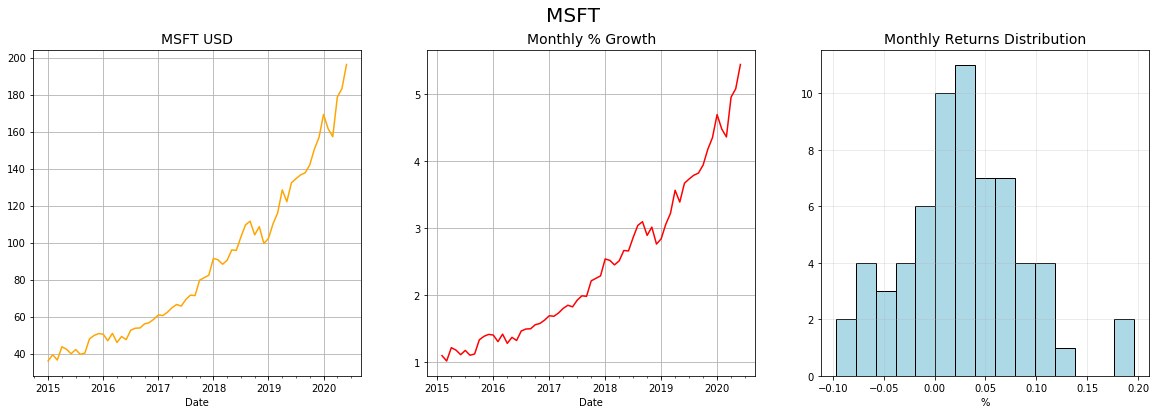

In [109]:
plt.figure(figsize=(20,6))
plt.suptitle("MSFT", fontsize=20)

plt.subplot(131)
plt.title("MSFT USD", fontsize=14)
data.resample("M").ffill().plot(color="orange")
plt.grid()

plt.subplot(132)
plt.title("Monthly % Growth", fontsize=14)
m_cret.plot(color="red")
plt.grid()

plt.subplot(133)
plt.title("Monthly Returns Distribution", fontsize=14)
plt.xlabel("%")
m_rets.hist(bins=15, ec="black", color="lightblue")
plt.grid(True, alpha=0.3)

###### Como en el histograma se puede apreciar que los retornos mensuales parecen distribuirse normalmente, es necesario poner a prueba estas hipótesis cono los test de Jarque-Bera & D’Agostino and Pearson’s

In [58]:
jb = ss.jarque_bera(pd.DataFrame(m_rets).dropna())
print("p-value:", round(jb[1],4))
print("elements:",len(m_rets)-1)

p-value: 0.4146
elements: 65


In [154]:
#normality test
nt = ss.normaltest(pd.DataFrame(m_rets).dropna())
print("p-value:", nt.pvalue)
print("elements:",len(m_rets)-1)

p-value: [0.2748643]
elements: 65


> <h6>Nota:</h6> 
>Dado que el p-valor fue mayor al 5% en ambas pruebas se acepta la $H_0$ de que los valores de los retornos mensuales siguen una distribución normal.

###### Ahora que se comprobó la normalidad de los retornos mensuales, se pueden hacer inferencias estadisticas utilizando el modelo de distribución normal.
### Probabilidad de que $P(X \geq 0.10)$

In [59]:
print("retorno promedio mensual:", round(m_mean,4), "\ny riesgo mensual", round(m_risk,4))

retorno promedio mensual: 0.0281 
y riesgo mensual 0.0597


In [62]:
#Enfoque apriori: probabilidad de que las ganancias mensuaes sean mayores al 10%
x = 0.10

Px = 1- ss.norm.cdf(x, m_mean, m_risk)
print("La probabilidad de que las ganancias mensuales sean mayores a "+ str(x*100)+"% es de", round(Px,4))

La probabilidad de que las gancias mensuales sean mayores a 10.0% es de 0.1141


In [118]:
#Enfoque frecuentista: probabilidad de que las ganancias mensuaes sean mayores al 10%
ten = []
for i in range(len(m_rets)):
    if m_rets[i] > 0.10:
        ten.append(m_rets[i])
        
print("La probabilidad según las frecuencias de que las ganancias mensuales sean mayores a 10%:", round(len(ten)/len(m_rets),4))

La probabilidad según las frecuencias de que las gancias mensuales sean mayores a 10%: 0.1061


> <h6>Nota:</h6> 
> Dados ambos enfoques de probabilidad se puede concluir que la probabilidad de que los retornos sean superiores al 10% en un periodo mensual es del: <h5> $ P(X \geq 0.10)=\frac{0.1141+ 0.1061}{2} = 11.01$% </h5> 

###### Grafica de la distribución de ganancias mensuales

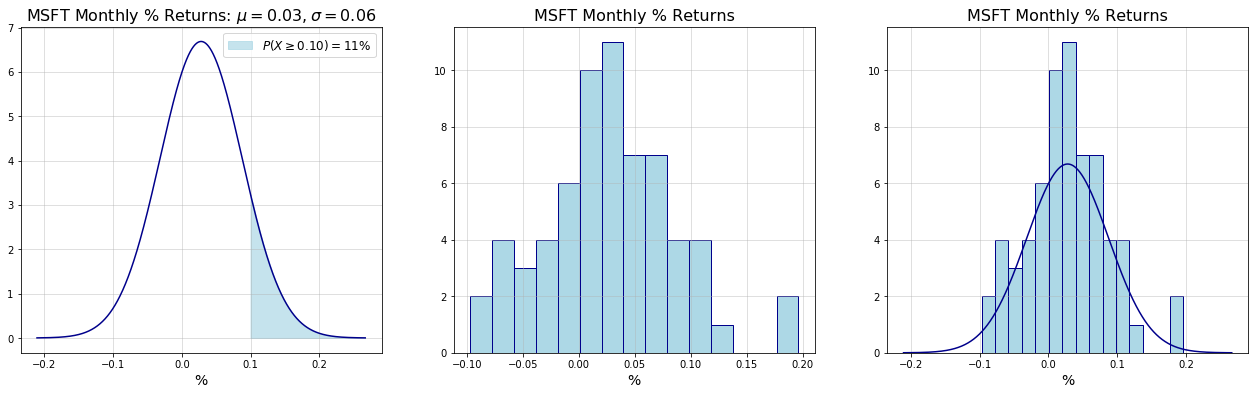

In [155]:
#datos para graficar
xmin = m_mean - 4*m_risk
xmax = m_mean + 4*m_risk

x = np.linspace(xmin, xmax, 10000)
y = ss.norm.pdf(x, m_mean, m_risk)

#Grafica
plt.figure(figsize=(22,6))

#Distribución normal
plt.subplot(131) 
plt.plot(x,y, color="darkblue")
plt.title("MSFT Monthly % Returns: $\mu = 0.03, \sigma=0.06$", fontsize=16)
plt.fill_between(x,y, where=[(x>=0.10) for x in x], 
                 label="$P(X \geq 0.10)=11$%",
                alpha=0.70, color="lightblue")
plt.xlabel("%", fontsize=14)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=12)

#Histograma
plt.subplot(132) 
plt.title("MSFT Monthly % Returns", fontsize=16)
plt.xlabel("%", fontsize=14)
m_rets.hist(bins=15, ec="darkblue", color="lightblue")
plt.grid(True, alpha=0.5)

#Gráficas combinadas
plt.subplot(133) 
plt.plot(x,y, color="darkblue")
m_rets.hist(bins=15, ec="darkblue", color="lightblue")
plt.title("MSFT Monthly % Returns", fontsize=16)
plt.xlabel("%", fontsize=14)
plt.grid(True, alpha=0.5)

plt.show()

### Fuentes:
- Codingfinance.com (2018) How to calculate stock returns in Python (written by DD). Consultado el 18 de junio de 2020 de: https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
- Gujarati & Porter (2010) Pruebas de normalidad. Econometría (5ta Edición). McGraw-Hill Education. Ciduad de México.
- Hilpisch Y. (2015) Normality Tests (Ch. 11 Statistics) Python for Finance: Analyze Big Financial Data. O'Reily. ISBN: 978-1-491-94528-5
- Scipy.org (2019) scipy.stats.nromaltest. Consultado el 18 de junio de 2020 de: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
- Wackerly, Mendenhall & Scheaffer (2010) La distribución de probabilidad normal (Cap. 4). Estadística matemática con aplicaciones (7ma Edición). CDMX. Cengage Learning.